# Data Analysis on Red Wine Quality Prediction
By Shuchao Huang

###  Introduction
My topic is using different models on my data and pursuing a prediction with a good accuracy. My dataset is about Red Wine Quality. I will use 11 kinds of attributes in my data to predict the quality of red-wine, which is the response value of my data. For every model, I would try to adjust parameters to get higher results. Different models fit different types of data, like image data, numerical data, categorical data, etc. I would try my best to understand each model’s theory briefly first and get to know what models are suitable for my dataset but still apply every one on my data, then compare the results to my hypothesis.<br>

I would like to use the accuracy to evaluate each model.

## Imports
<font color=#FF0000 size=3.5>If there is any error for importing some of these packages, please install using "conda install" command in Terminal before import them. <br> If there is still any error for importing the same package after installing, please use other command for that package. For the install command, please search on Google, like search "conda install (package's name)"</font>

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

%matplotlib inline

/Users/hscdepro/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Load data

In [4]:
data = pd.read_csv('winequality-red.txt', sep='\t')

## Data Structure
the dataset has about 1600 rows of records and each row has 12 columns, 11 columns for attributes and the last one is the response value. 

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Check missing value
It is very lucky that this dataset is integrated and doesn't have any missing value. 

In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Plot for each attributes to see the frequency distribution
have a brief understanding of each attribute in my data. 

In [8]:
 colnames = list(data.describe())

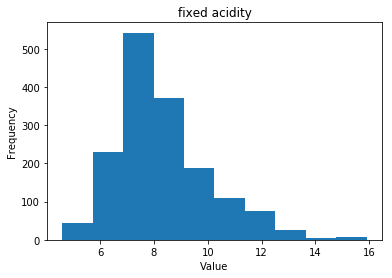

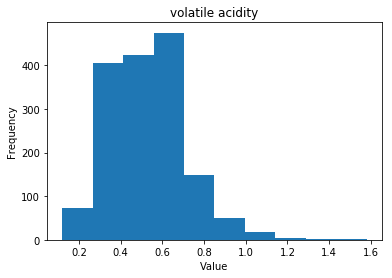

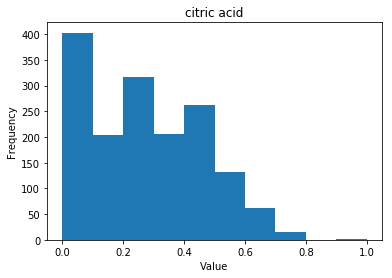

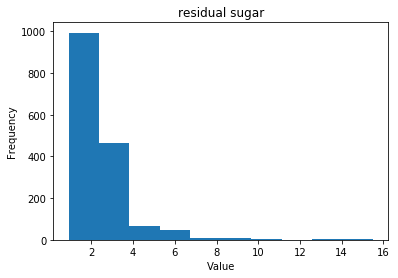

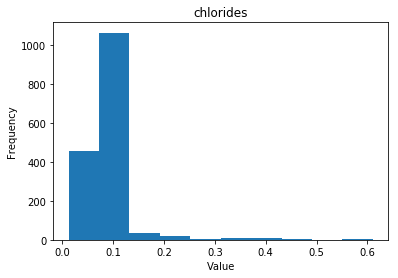

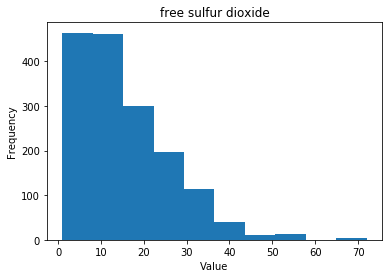

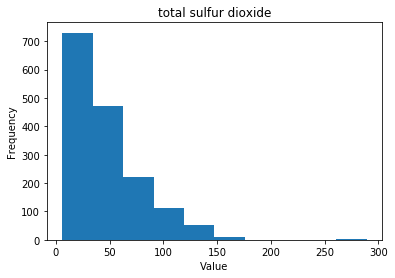

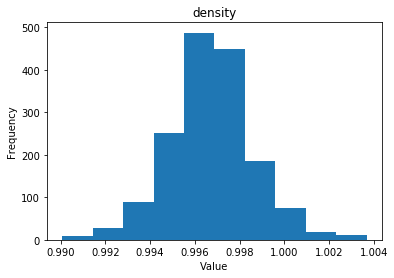

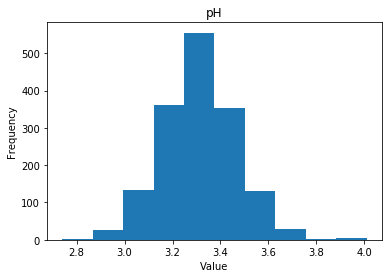

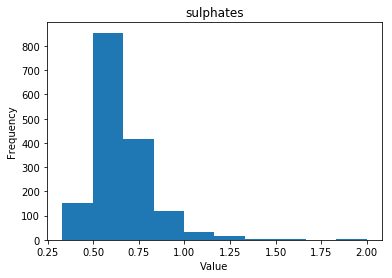

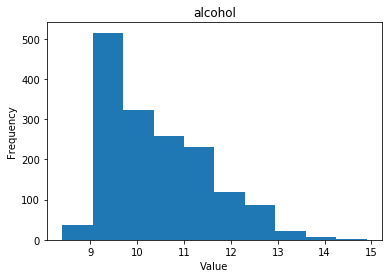

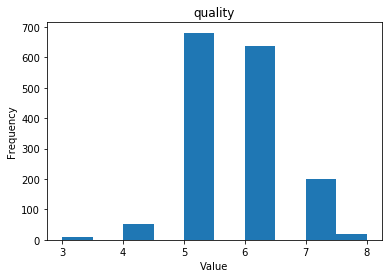

In [29]:
for i in range(len(colnames)):
    #plt.hold(True)
    plt.figure()
    plt.hist(data[colnames[i]])
    plt.title(colnames[i])
    plt.xlabel("Value")
    plt.ylabel("Frequency")

## Check and plot the correlation of attributes.
According to the results, some of the attributes are positive correlation while some are negative correlation. 

In [8]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


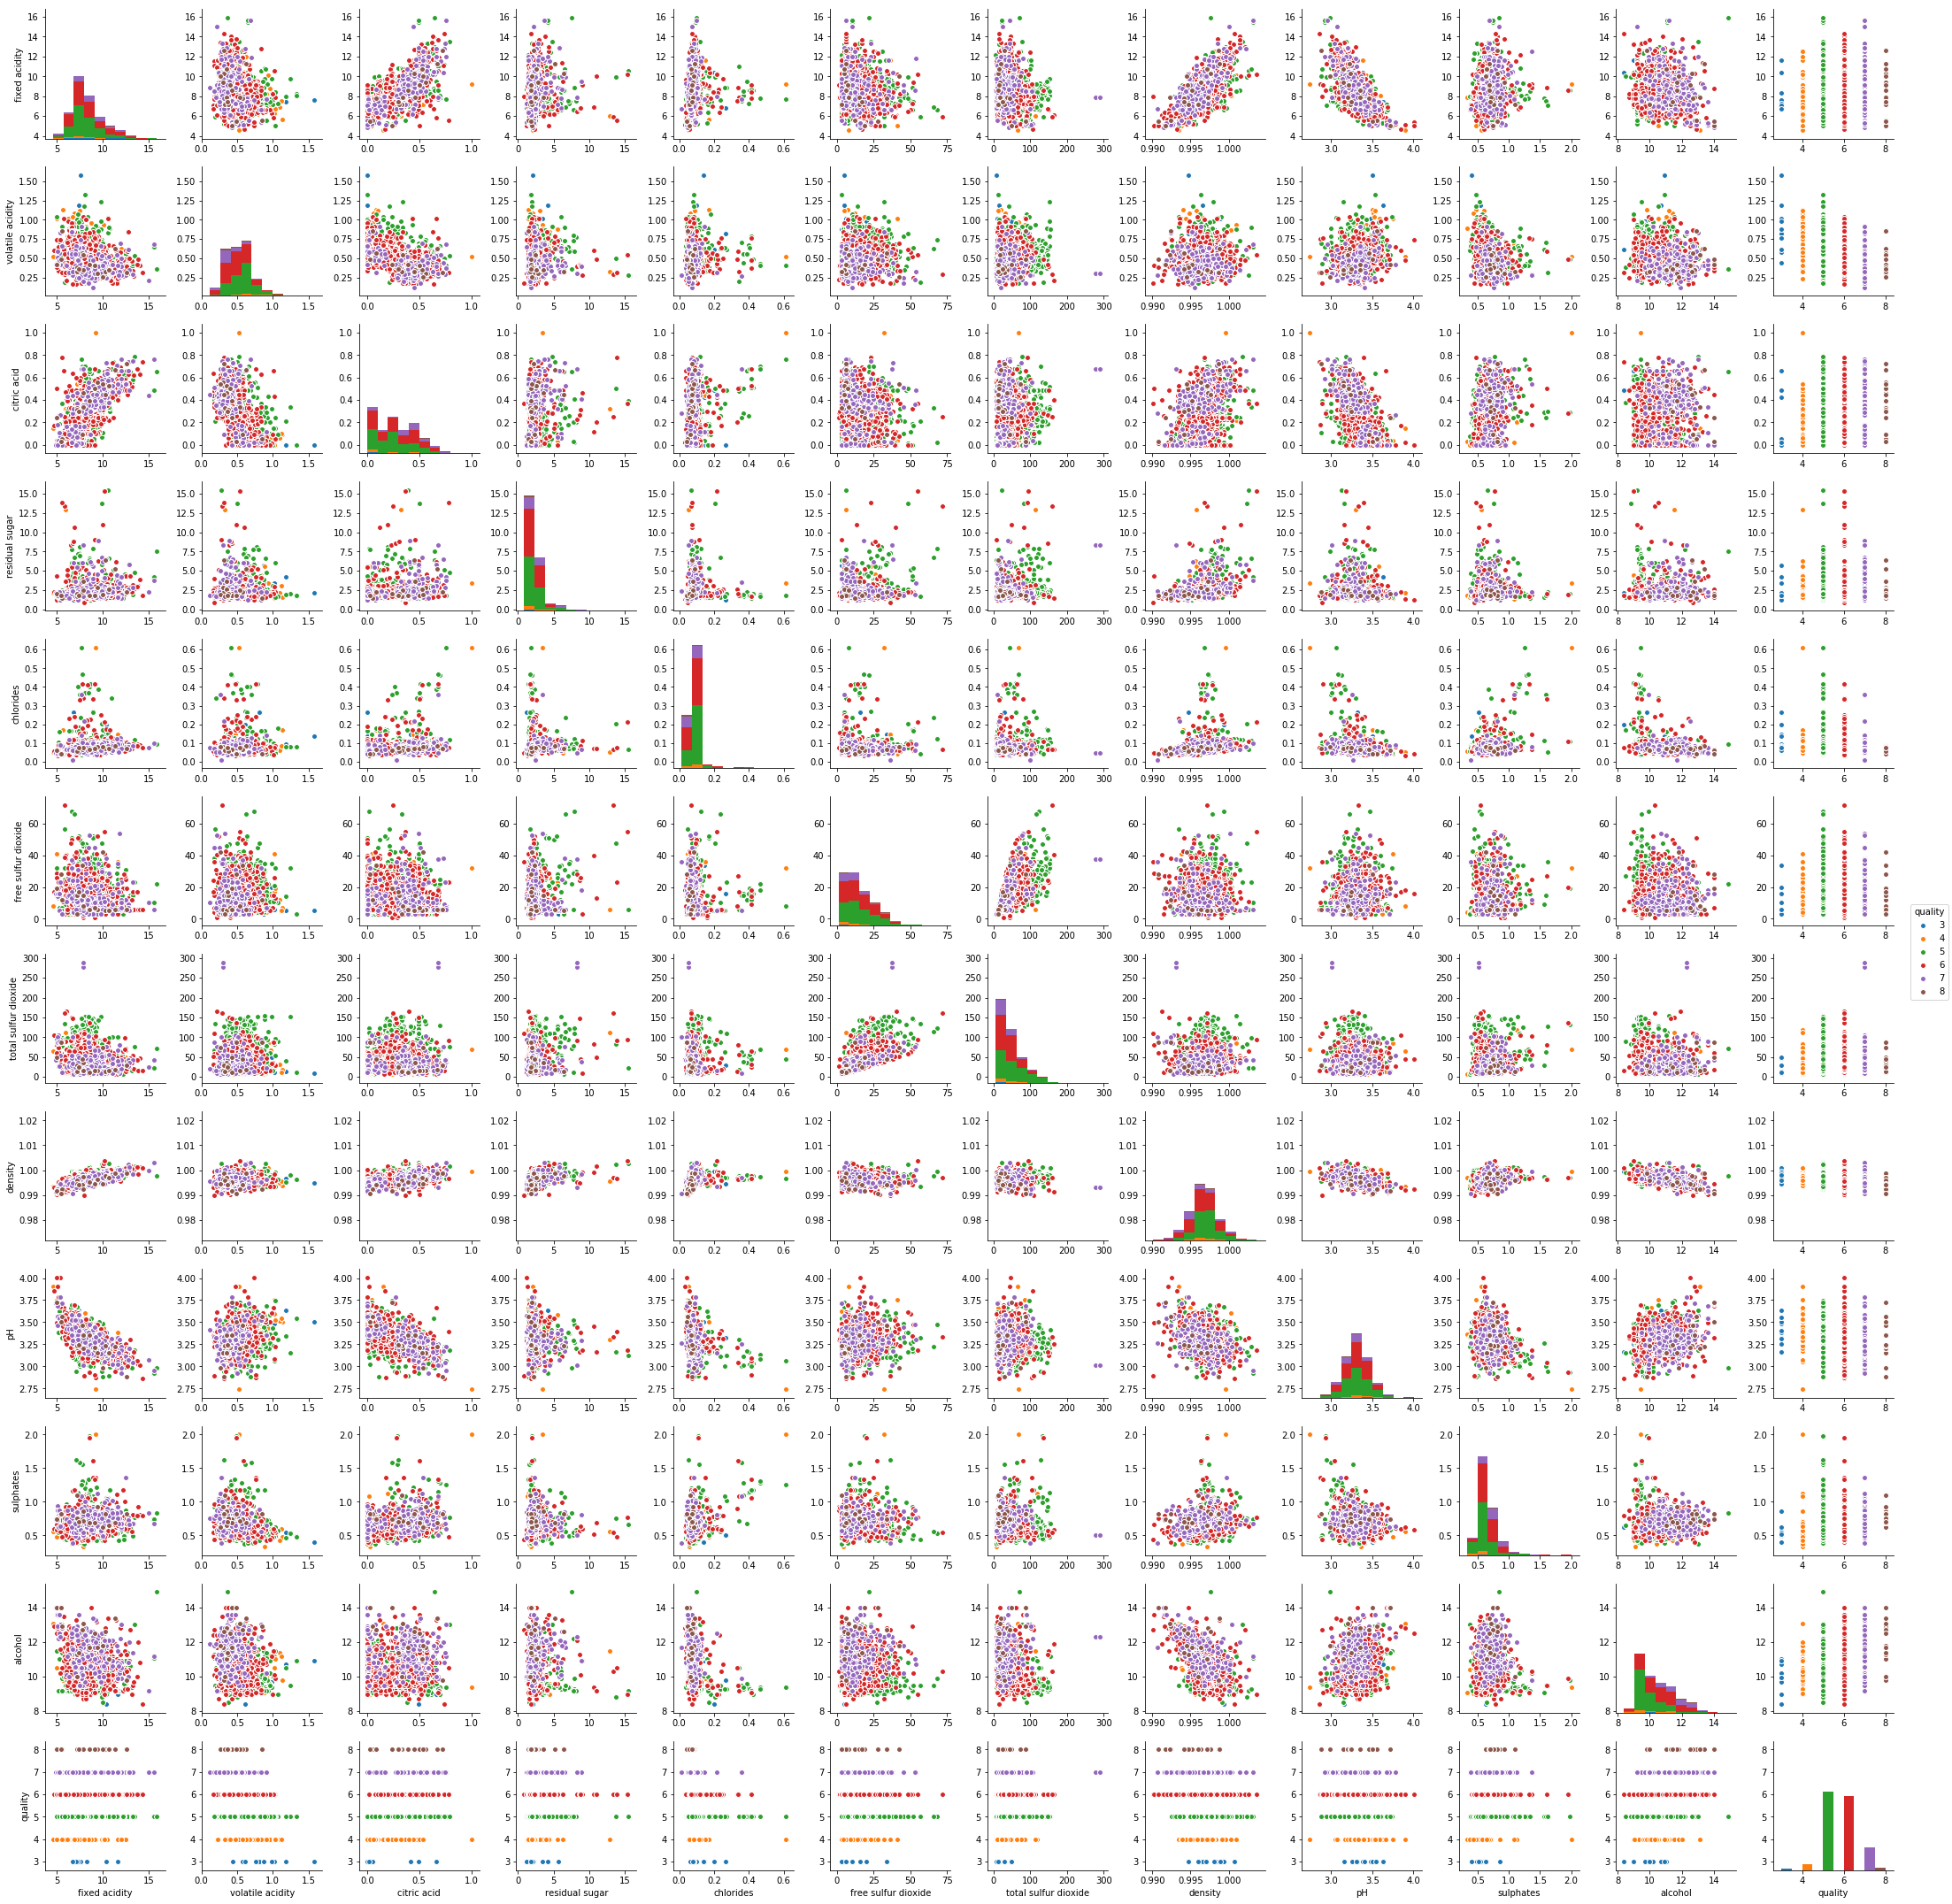

In [9]:
sns.pairplot(data, hue='quality')

## Split the data into training and testing
the 12th column is the response value of my data. 

In [9]:
df = data.values
train, test = train_test_split(df, test_size=0.3, random_state=1)
train_x = train[:, :11]
train_y = train[:, 11:12]
test_x = test[:, :11]
test_y = test[:, 11:12]

## Begin the first prediction with Linear Regression. 
First, Check the p-value of each attribute.

##### Reference: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression; (This reference document is licensed under Creative Commons Attribution-Share Alike.)

In [17]:
train_X = sm.add_constant(train_x)
est = sm.OLS(train_y, train_X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     59.94
Date:                Sat, 21 Apr 2018   Prob (F-statistic):          2.49e-104
Time:                        17:06:30   Log-Likelihood:                -1101.4
No. Observations:                1119   AIC:                             2227.
Df Residuals:                    1107   BIC:                             2287.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.5469     25.487      1.434      0.1

## Linear Regression

according to the p-value above, I just select the attributes that p-values are less than 0.05.

In [18]:
train_x1 = train_x[:, [1, 4, 5, 6, 9, 10]]
train_X1 = sm.add_constant(train_x1)
est3 = sm.OLS(train_y, train_X1)
est4 = est3.fit()
print(est4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     105.8
Date:                Sat, 21 Apr 2018   Prob (F-statistic):          1.73e-105
Time:                        17:06:31   Log-Likelihood:                -1110.1
No. Observations:                1119   AIC:                             2234.
Df Residuals:                    1112   BIC:                             2269.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0863      0.246     12.568      0.0

## Linear Regression
from the above, the p-values of the attributes I selected are less than 0.05, but the R-squared is just 0.360, so linear regession may not a good choice. Let me use this model to make a prediction then calcuate the acccuracy. The result is consistent with what I expected. The accuracy is relatively low, only about 40%.

In [19]:
lm = LinearRegression()
lm_model = lm.fit(train_x1, train_y)
pred_y = lm_model.predict(test_x[:, [1, 4, 6, 8, 9, 10]])
pred_y = np.round(pred_y)
pred_y = pred_y.astype(int)
lm_accuracy = accuracy_score(test_y, pred_y)
print('the accuracy of linear regression: %.4f' %lm_accuracy)

the accuracy of linear regression: 0.4375


## Linear Regression
Plot the results.
The X axis is the real quality, and Y axis is the prediction. 

Text(0.5,1,'linear regression')

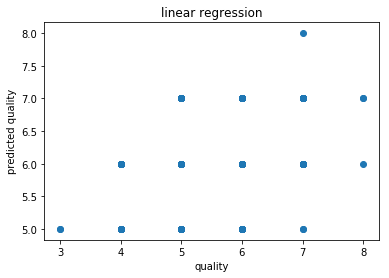

In [20]:
plt.scatter(test_y, pred_y)
plt.xlabel('quality')
plt.ylabel('predicted quality')
plt.title('linear regression')

<font color=#0000FF size=3.5>The X axis is the real quality, and Y axis is the prediction. </font>

## Linear Regression
Plot another graph to see the results.
##### Reference: https://www.zhihu.com/question/55802200; (This is referenced from a Chinese open source website.)

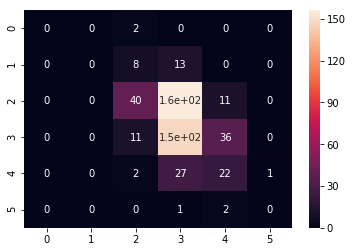

In [21]:
cm = pd.DataFrame(confusion_matrix(test_y, pred_y))
sns.heatmap(cm, annot=True)

<font color=#0000FF size=3.5>The X axis is the real quality, and Y axis is the prediction. </font>

## Second: Decision Tree
Establish a model.

In [22]:
dst = tree.DecisionTreeClassifier()
ds_model = dst.fit(train_x, train_y)

## Decision Tree
Plot the graph of Decision Tree model.<br> the features are the first 11 columns and the class is the last column. 

##### Reference: http://scikit-learn.org/stable/modules/tree.html; (This reference document is licensed by BSD license. )

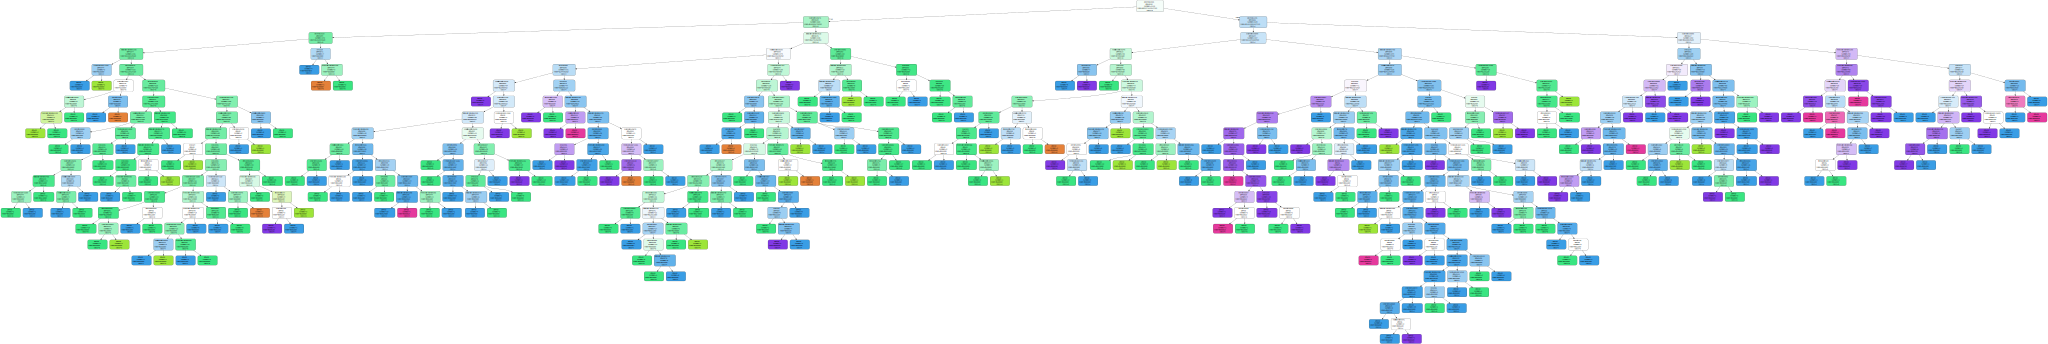

In [28]:
dot_data = tree.export_graphviz(ds_model, out_file=None, 
                         feature_names=colnames[0:11],  
                         class_names=colnames[11],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Decision Tree
make the prediction, compare with the real quality and calculate the accuracy.

In [24]:
pred_y = ds_model.predict(test_x)
ds_accuracy = accuracy_score(test_y, pred_y)
print('the accuracy of decision tree: %.4f' %ds_accuracy)

the accuracy of decision tree: 0.6125


## Decision Tree
Plot the results. The X axis is the real quality, and Y axis is the prediction.

Text(0.5,1,'decision tree')

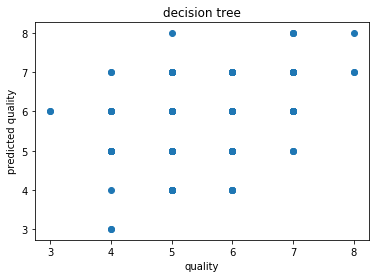

In [25]:
plt.scatter(test_y, pred_y)
plt.xlabel('quality')
plt.ylabel('predicted quality')
plt.title('decision tree')

<font color=#0000FF size=3.5>The X axis is the real quality, and Y axis is the prediction. </font>

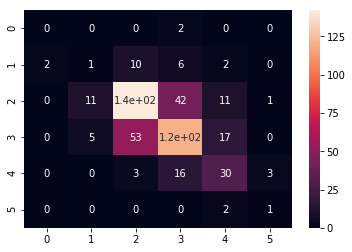

In [26]:
cm = pd.DataFrame(confusion_matrix(test_y, pred_y))
sns.heatmap(cm, annot=True)

<font color=#0000FF size=3.5>The X axis is the real quality, and Y axis is the prediction. </font>

## Third: Random Forest
Establish the model.<br>
n_estimators is the number of trees in the forest.<br>
min_samples_split is the minimum number of samples required to split an internal node.<br>
random_state is the seed used by the random number generator.
##### Reference: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html; (This reference document is licensed under BSD license. )

In [30]:
rf = RandomForestClassifier(n_estimators=250, max_depth=15, min_samples_split=2, random_state=0)
rf_model = rf.fit(train_x, train_y.ravel())

## Random Forest
make the prediction and calculate the accuracy.

In [32]:
pred_y = rf_model.predict(test_x)
rf_accuracy = accuracy_score(test_y, pred_y)
print('the accuracy of random forest: %.4f' %rf_accuracy)

the accuracy of random forest: 0.6875


Text(0.5,1,'random forest')

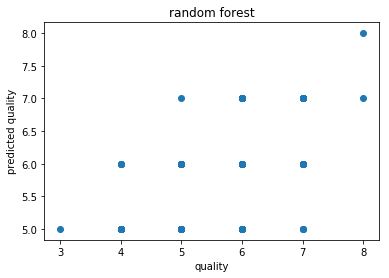

In [24]:
plt.scatter(test_y, pred_y)
plt.xlabel('quality')
plt.ylabel('predicted quality')
plt.title('random forest')

<font color=#0000FF size=3.5>The X axis is the real quality, and Y axis is the prediction. </font>

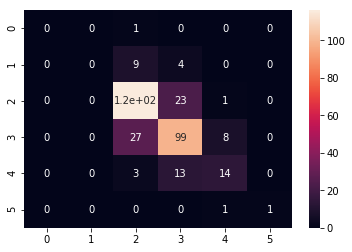

In [25]:
cm = pd.DataFrame(confusion_matrix(test_y, pred_y))
sns.heatmap(cm, annot=True)

<font color=#0000FF size=3.5>The X axis is the real quality, and Y axis is the prediction. </font>

## Neural Network

## Imports
<font color=#FF0000 size=3.5>If there is any error for importing some of these packages, please install using "conda install" command in Terminal before import them. <br> If there still is any error for importing the same package after installing, please use other command for that package. For the install command, please search on Google, like search "conda install (package's name)"</font>

In [10]:
# df = data.values
# train, test = train_test_split(df, test_size=0.2)
# train_x = train[:, :11]
# train_y = train[:, 11:12]
# test_x = test[:, :11]
# test_y = test[:, 11:12]
import random
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dropout,Input, Add, Dense, Activation, ZeroPadding1D, ZeroPadding2D, BatchNormalization, Flatten, Conv1D, MaxPooling1D
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import Adam
from keras.models import load_model
from keras import metrics
from keras import losses

Using TensorFlow backend.


## Neural Network
Normalization and split the data.

In [11]:
norm_x = (train_x - train_x.mean(axis=0)) / train_x.std(axis = 0)
training_x, validation_x, training_y, validation_y = train_test_split(norm_x, train_y, test_size=0.2, random_state=1)

## Neural Network
I used the keras package.<br>
Sequential() is for initializing the model.

for the cost function, I used 'categorical_crossentropy' because my response value is categorical. 

model.add(Dense(6, activation='softmax')), the parameter '6' means the 6 levels of response value. 

training_labels = keras.utils.to_categorical(training_y.astype(int) - 3, num_classes=6);<br>
validation_labels = keras.utils.to_categorical(validation_y.astype(int) - 3, num_classes=6);<br>
it's converting the response value(categorical variable) to dummy variable.
##### Reference: <br>https://keras.io/layers/core/; <br>https://keras.io/layers/core/#activation;<br>(These referenced documents are licensed under the MIT license.)

In [12]:
model = Sequential()
model.add(Dense(64, input_shape=training_x.shape[1:], activation='linear'))
model.add(Dense(6, activation='softmax'))  #6 for the 6 levels of response value. 
adam_opt = keras.optimizers.Adam(lr=0.005, 
                                 beta_1=0.9, 
                                 beta_2=0.999, 
                                 epsilon=1e-08, 
                                 decay=0.01)   #gradient estimation
model.compile(optimizer=adam_opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
            #define the optimizer, cost function and use the accuracy to evaluate the model

training_labels = keras.utils.to_categorical(training_y.astype(int) - 3, num_classes=6)
validation_labels = keras.utils.to_categorical(validation_y.astype(int) - 3, num_classes=6)
                            #convert the response value(categorical variable) to dummy variable
model.fit(training_x, training_labels,
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_data=(validation_x, validation_labels))


Train on 895 samples, validate on 224 samples
Epoch 1/100
895/895 [==============================] - 0s 179us/step - loss: 1.7133 - acc: 0.3106 - val_loss: 1.4660 - val_acc: 0.5134
Epoch 2/100
895/895 [==============================] - 0s 29us/step - loss: 1.3601 - acc: 0.5497 - val_loss: 1.3220 - val_acc: 0.5357
Epoch 3/100
895/895 [==============================] - 0s 40us/step - loss: 1.2004 - acc: 0.5899 - val_loss: 1.2241 - val_acc: 0.5804
Epoch 4/100
895/895 [==============================] - 0s 47us/step - loss: 1.1151 - acc: 0.6067 - val_loss: 1.1612 - val_acc: 0.5625
Epoch 5/100
895/895 [==============================] - 0s 30us/step - loss: 1.0562 - acc: 0.6145 - val_loss: 1.1061 - val_acc: 0.5536
Epoch 6/100
895/895 [==============================] - 0s 50us/step - loss: 1.0153 - acc: 0.6056 - val_loss: 1.0712 - val_acc: 0.5312
Epoch 7/100
895/895 [==============================] - 0s 38us/step - loss: 0.9861 - acc: 0.6156 - val_loss: 1.0358 - val_acc: 0.5357
Epoch 8/100
895

Epoch 61/100
895/895 [==============================] - 0s 35us/step - loss: 0.9089 - acc: 0.6168 - val_loss: 0.9664 - val_acc: 0.5625
Epoch 62/100
895/895 [==============================] - 0s 35us/step - loss: 0.9086 - acc: 0.6179 - val_loss: 0.9671 - val_acc: 0.5714
Epoch 63/100
895/895 [==============================] - 0s 32us/step - loss: 0.9091 - acc: 0.6179 - val_loss: 0.9687 - val_acc: 0.5670
Epoch 64/100
895/895 [==============================] - 0s 41us/step - loss: 0.9090 - acc: 0.6179 - val_loss: 0.9681 - val_acc: 0.5625
Epoch 65/100
895/895 [==============================] - 0s 40us/step - loss: 0.9082 - acc: 0.6190 - val_loss: 0.9670 - val_acc: 0.5759
Epoch 66/100
895/895 [==============================] - 0s 28us/step - loss: 0.9088 - acc: 0.6212 - val_loss: 0.9650 - val_acc: 0.5759
Epoch 67/100
895/895 [==============================] - 0s 26us/step - loss: 0.9083 - acc: 0.6201 - val_loss: 0.9651 - val_acc: 0.5714
Epoch 68/100
895/895 [==============================] -

## Neural Networks Tune
Search the best parameters randomly and try to get the best model.

model.add(Dropout(0.25)) is to prevent for overfitting.

histories.append(history_i) is creating a list which consists of parameters and results.
##### Reference:<br> https://keras.io/layers/core/#dropout; <br>https://keras.io/activations/;<br>(These referenced documents are licensed under the MIT license.)

In [13]:
activations = ['elu', 'relu', 'linear', 'tanh', 'selu', 'softsign', 'softplus']
n_random_tries = 50
histories = []
models = []
for i in range(n_random_tries):
    print('Training model ' + str(i))
    activation = activations[random.randint(0,len(activations)-1)]
    units = random.randint(100,600)
    layers = random.randint(3,7)
    epochs = random.randint(100,500)
    
    model = Sequential()
    model.add(Dense(units, 
                    input_shape=training_x.shape[1:], 
                    activation=activation))
    model.add(Dropout(0.25))   #to prevent for overfitting.

    for i in range(layers-2):   #except input layer and output layer
        model.add(Dense(units, activation=activation))
        model.add(Dropout(0.25))   # add i layers

    model.add(Dense(6, activation='softmax'))   #output layer

    adam_opt = keras.optimizers.Adam(lr=0.005, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-08, 
                                     decay=0.01)   #gradient estimation
    
    model.compile(optimizer=adam_opt, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
            #define the optimizer, cost function and use the accuracy to evaluate the model
    history = model.fit(training_x, training_labels,
                        batch_size=128,
                        epochs=epochs,
                        verbose=0,
                        validation_data=(validation_x, validation_labels),
                        shuffle=False)    # make the prediction
    
    history_i = [activation,
                 units,
                 layers,
                 epochs,
                 history.history['val_acc'][-1]]  #validation data set's accuracy.
    histories.append(history_i)  #create a list consists of parameters and outcomes.
    print(history_i)

Training model 0
['softsign', 556, 6, 421, 0.97877095078622833]
Training model 1
['linear', 345, 7, 378, 0.60782122505443725]
Training model 2
['relu', 594, 7, 120, 0.93854748396900112]
Training model 3
['selu', 335, 5, 316, 0.86815642098474766]
Training model 4
['softsign', 479, 4, 380, 0.94748603038947676]
Training model 5
['relu', 378, 3, 154, 0.88826815755673627]
Training model 6
['tanh', 481, 6, 279, 0.97877095078622833]
Training model 7
['elu', 405, 3, 298, 0.69385474720480722]
Training model 8
['tanh', 351, 3, 497, 0.85921787929268523]
Training model 9
['relu', 303, 5, 249, 0.959776537911186]
Training model 10
['relu', 297, 4, 496, 0.96759776802702324]
Training model 11
['selu', 337, 5, 106, 0.75530726376858504]
Training model 12
['linear', 560, 3, 297, 0.61229050618976189]
Training model 13
['softsign', 534, 6, 376, 0.98324022559480295]
Training model 14
['softsign', 372, 3, 335, 0.81787709084303017]
Training model 15
['elu', 196, 6, 342, 0.80446927387621148]
Training model 16


### Neural Networks
sort the results and pick up the top 15 results.

In [14]:
val_acc = [item[4] for item in histories]
val_facc = np.asarray(val_acc)
best_inds = val_facc.argsort()[35:50]

### Neural Networks
save the model of the highest 15 accuracy records into a local file. 

'.h5' is a kind of model file type. 

In [15]:
print('Best Results:')
for i in range(len(best_inds)):
    print(histories[best_inds[i]])
    model_name = 'train-results/k_model_' + str(i) + '.h5'
    model.save(model_name)

Best Results:
['elu', 350, 7, 260, 0.92849161751443443]
['relu', 203, 6, 331, 0.93407821022598436]
['relu', 335, 4, 142, 0.93631285289146382]
['relu', 594, 7, 120, 0.93854748396900112]
['relu', 191, 6, 434, 0.9418994371451479]
['softsign', 479, 4, 380, 0.94748603038947676]
['softsign', 519, 6, 158, 0.95083799042515249]
['relu', 402, 5, 118, 0.95307262942777671]
['relu', 303, 5, 249, 0.959776537911186]
['softsign', 467, 5, 316, 0.96759776642868633]
['relu', 297, 4, 496, 0.96759776802702324]
['softsign', 556, 6, 421, 0.97877095078622833]
['tanh', 481, 6, 279, 0.97877095078622833]
['softsign', 534, 6, 376, 0.98324022559480295]
['tanh', 543, 5, 492, 0.99217877094972062]


## CNN
I also tried to use the CNN.

model.add(Dense(6, activation='softmax'))  the parameter '6' means the 6 levels of response value. <br>
filter is the dimensionality of the output space;<br>
kernel_size specifying the length of the 1D convolution window;<br>
strides specifying the stride length of the convolution;<br>
valid means no padding;
##### Reference:<br> https://keras.io/layers/core/#reshape; <br>https://keras.io/layers/convolutional/#conv1d;<br> https://keras.io/layers/pooling/#maxpooling1d;<br>(These referenced documents are licensed under the MIT license.)

In [59]:
training_X = training_x.reshape(training_x.shape[0], training_x.shape[1], 1)
validation_X = validation_x.reshape(validation_x.shape[0], validation_x.shape[1], 1)
model = Sequential()
model.add(Conv1D(filters=1, kernel_size=1, strides=2, padding='valid', input_shape=(11, 1),kernel_initializer= 'uniform'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling1D(pool_size=1, padding='same'))

model.add(Conv1D(filters=1, kernel_size=5, strides=2, padding='same',kernel_initializer= 'uniform'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling1D(pool_size=1, padding='same'))

model.add(Conv1D(filters=1, kernel_size=5, strides=2, padding='same',kernel_initializer= 'uniform'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling1D(pool_size=1, padding='same'))

model.add(Conv1D(filters=1, kernel_size=5, strides=2, padding='same',kernel_initializer= 'uniform'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling1D(pool_size=1, padding='same'))

model.add(Conv1D(filters=1, kernel_size=1, strides=2, padding='valid',kernel_initializer= 'uniform'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling1D(pool_size=1))

model.add(Flatten())
model.add(Dense(32, activation='relu'))     #output 32 neurals.

model.add(Dense(6, activation='softmax'))   
                                    #the parameter '6' means the 6 levels of response value. 
adam_opt = keras.optimizers.Adam(lr=0.005,
                                 beta_1=0.9, 
                                 beta_2=0.999, 
                                 epsilon=1e-08, 
                                 decay=0.01)      #Customize gradient estimation

model.compile(optimizer = 'adagrad',              #Gradient estimation
              loss='categorical_crossentropy', 
              metrics=['accuracy'])    
        #define the optimizer, cost function and use the accuracy to evaluate the model
model.fit(training_X, training_labels,
          batch_size=128,  
          epochs=50,                            
          verbose=1,
          validation_data=(validation_X, validation_labels))

Train on 895 samples, validate on 224 samples
Epoch 1/50
895/895 [==============================] - 15s 17ms/step - loss: 1.7111 - acc: 0.2927 - val_loss: 1.5687 - val_acc: 0.4643
Epoch 2/50
895/895 [==============================] - 0s 225us/step - loss: 1.5394 - acc: 0.4346 - val_loss: 1.4480 - val_acc: 0.5357
Epoch 3/50
895/895 [==============================] - 0s 213us/step - loss: 1.4109 - acc: 0.5296 - val_loss: 1.3443 - val_acc: 0.5223
Epoch 4/50
895/895 [==============================] - 0s 214us/step - loss: 1.3364 - acc: 0.5307 - val_loss: 1.2953 - val_acc: 0.5268
Epoch 5/50
895/895 [==============================] - 0s 223us/step - loss: 1.2849 - acc: 0.5385 - val_loss: 1.2553 - val_acc: 0.5357
Epoch 6/50
895/895 [==============================] - 0s 174us/step - loss: 1.2414 - acc: 0.5352 - val_loss: 1.1962 - val_acc: 0.5134
Epoch 7/50
895/895 [==============================] - 0s 219us/step - loss: 1.2119 - acc: 0.5408 - val_loss: 1.1708 - val_acc: 0.5268
Epoch 8/50
895/8

### Conclusion
##### Linear Regression
the R-squared is just 0.360, so linear regession may not a good choice to make the prediction for this dataset. I still tried it and the result is consistent with what I expected. The accuracy is relatively low, only about 40%. I think it is because the distributions of some variables are not the normal distribution. Besides, the response value of my data is categorical, so this is a classification problem, so the low accuracy of linear regression is acceptable.<br>
##### CNN
For the CNN, I think CNN is mainly used to analyze image data, but my data is a two-dimensional data. Besides, the type of my data is different from image data. In spite of I tried normalization, however, it still has a great influence. So the results of CNN are not good, basically between 50% to 60%.<br>
##### Others
I also tried Decision Tree, Random Forest and Neural Networks. The results of Decision Tree and Random Forest is not very good, basically between 60% to 70%, but I think if I use the randomly search like what I did in Neural Networks, maybe the results of these two models can be better. After randomly search, the result of Neural Networks is pretty good, over 90%. 

### Citation
1. https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression; (This reference document is licensed under Creative Commons Attribution-Share Alike.) <br>
2. https://www.zhihu.com/question/55802200; (This is referenced from a Chinese open source website.)<br>
3. http://scikit-learn.org/stable/modules/tree.html; (This reference document is licensed by BSD license. )<br>
4. http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html; (This reference document is licensed under BSD license.)<br>
5. https://keras.io/layers/core/; <br>https://keras.io/layers/core/#activation;<br>(These referenced documents are licensed under the MIT license.)<br>
6. https://keras.io/layers/core/#reshape; <br>https://keras.io/layers/convolutional/#conv1d;<br> https://keras.io/layers/pooling/#maxpooling1d;<br>(These referenced documents are licensed under the MIT license.)

### License (MIT)

Copyright © 2018 by Shuchao Huang

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.